In [116]:
# Required
from matplotlib import pyplot as plt
import numpy as np
from math import pi, sin, cos, sqrt, pow, radians, degrees, hypot

A solid steel shaft with Sy= 250MPa, carries belt tensions at pulley C, as shown in Figure below. Given diameter of pulley is 300mm, and a factor of safety of n=1.5, design the shaft according to the following failure criteria

Maximum shear stress

Maximum energy of distortion



![Q1](figs/t5-q1-1.png)

In [117]:
F1 = 5000
F2 = 1000
rC = 0.15
Sy= 250E+6
FOS=1.5

Step 1

In [118]:
TorqueA = (F1-F2)*rC
print(f'Torque = {TorqueA} Nm')

Torque = 600.0 Nm


In [119]:
Fc=F1+F2
print(f'Total Load, Fc = {Fc} N')

Total Load, Fc = 6000 N


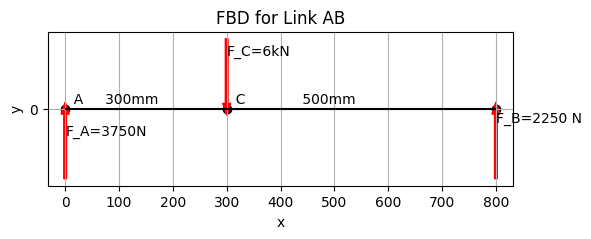

In [120]:
# FBD for Link AB

coorA = [0,0]
coorB = [800,0]
coorC = [300,0]

data = np.array([coorA,coorB,coorC])
x, y = data.T
fig, ax = plt.subplots()
fig.set_size_inches(6,2)
ax.grid()
ax.set_yticks([0])
ax.scatter(x,y, color='k')
ax.arrow(coorA[0],coorA[1]-130, 0,120,width=5,color='r')
ax.arrow(coorB[0],coorB[1]-130, 0,120,width=5,color='r')
ax.vlines(coorC[0],0,coorC[1], color='k', linestyles='dashed')
ax.arrow(coorC[0],coorC[1]+130, 0,-120,width=5,color='r')
ax.hlines(0,0,800, color='k')

ax.set(xlabel='x', ylabel='y',
       title='FBD for Link AB')

ax.text(coorA[0],coorA[1]-50,f'F_A=3750N')
ax.text(coorB[0],coorB[1]-25,f'F_B=2250 N')
ax.text(coorC[0],coorC[1]+100,f'F_C=6kN')
ax.text(coorA[0],coorA[1]+10,f'  A     300mm')
ax.text(coorC[0],coorC[1]+10,f'  C             500mm')

plt.axis('equal')
plt.show()

$$+\circlearrowleft \sum M_A=0$$
$$-F_C(0.3)+F_B(0.8)=0$$
$$-(6000)(0.3)+F_B(0.8)=0$$

$$+\uparrow \sum F_x=0$$
$$F_A+F_B-6000=0$$

In [121]:
Fb=(Fc*300)/(800)
print(f'Reaction at B, Fb = {Fb:.2f} N')
Fa=6000-Fb
print(f'Reaction at A, Fa = {Fa:.2f} N')

Reaction at B, Fb = 2250.00 N
Reaction at A, Fa = 3750.00 N


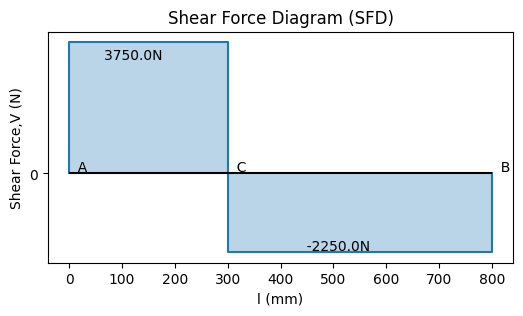

In [127]:
# Distance in mm
ab=800
ac=300

y = [0,0,ac,ac,ab,ab]
V = [0,Fa,Fa,Fa-Fc,Fa-Fc,0]

fig, ax1 = plt.subplots()
fig.set_size_inches(6,3)
ax1.set_yticks([0])
# SFD
ax1.plot(y,V)
ax1.hlines(0,0,ab,colors='black')
ax1.fill_between(y, V, alpha=0.3) # Added fill_between
ax1.set_title('Shear Force Diagram (SFD)')
ax1.set_xlabel('l (mm)')
ax1.set_ylabel('Shear Force,V (N)')

ax1.text(coorA[0],coorA[1]+50,f'  A')
ax1.text(coorB[0],coorB[1]+50,f'  B')
ax1.text(coorC[0],coorC[1]+50,f'  C')
ax1.text(coorA[0],V[1]-500,f'        {V[1]}N')
ax1.text(coorC[0],V[3]+50,f'                  {V[3]}N')
# plt.tight_layout()
plt.show()

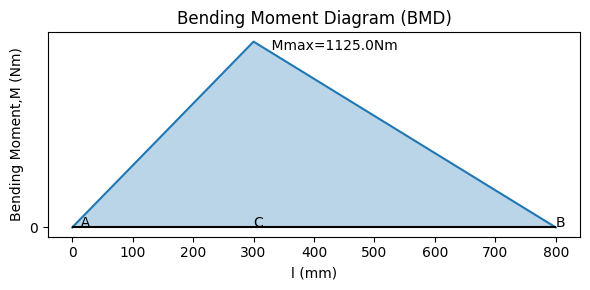

In [128]:
# BMD

y=[0,ac,ab]
M=[0,Fa*ac/1000,0]

fig, ax2 = plt.subplots()
fig.set_size_inches(6,3)
ax2.set_yticks([0])
ax2.plot(y,M)
ax2.hlines(0,0,ab,colors='black')
ax2.fill_between(y, M, alpha=0.3) # Added fill_between
ax2.set_title('Bending Moment Diagram (BMD)')
ax2.set_xlabel('l (mm)')
ax2.set_ylabel('Bending Moment,M (Nm)')

ax2.text(coorA[0],coorA[1]+5,f'  A')
ax2.text(coorB[0],coorB[1]+5,f'B')
ax2.text(coorC[0],coorC[1]+5,f'C')

ax2.text(coorC[0],M[1]-50,f'    Mmax={M[1]}Nm')

plt.tight_layout()
plt.show()

In [124]:
Mmax=Fa*ac/1000
print(f'Maximum Bending Moment, Mmax = {Mmax} Nm')

Maximum Bending Moment, Mmax = 1125.0 Nm


In [125]:
Dmss3 = 32*FOS*hypot(Mmax,TorqueA)/(Sy*pi)
Dmss = round(pow(32*FOS*hypot(Mmax,TorqueA)/(Sy*pi),1/3),5)
print(f'D^3 = {Dmss3}m^3')
print(f'Diameter = {Dmss}m')

D^3 = 7.792226013779195e-05m^3
Diameter = 0.04271m


In [126]:
Dmed3 = 32*FOS*sqrt(pow(Mmax,2)+0.75*pow(TorqueA,2))/(Sy*pi)
Dmed = round(pow(32*FOS*sqrt(pow(Mmax,2)+0.75*pow(TorqueA,2))/(Sy*pi),1/3),5)
print(f'D^3 = {Dmed3}m^3')
print(f'Diameter = {Dmed}m')

D^3 = 7.573453145521214e-05m^3
Diameter = 0.04231m
